# Read data then split by sentences

In [1]:
import tqdm as notebook_tqdm
import modin.pandas as pd

#############################################
### For the purpose of timing comparisons ###
#############################################
import time
import modin
modin.config.Engine.put("Dask")

from distributed import Client
client = Client()

In [2]:
dataset_path = "/home/ubuntu/WORK/selfexplain-semantic-topic-modeling/dataset/" \
    + "3_tripadvisor_len_review_227per_hotel_label_vader.csv"

In [3]:
df = pd.read_csv(dataset_path)
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 48198 entries, 0 to 48197
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel        48198 non-null  int64 
 1   sentence     48198 non-null  object
 2   label_vader  48198 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [10]:
df['label'] = df['label_vader']

In [11]:
df['label'].value_counts()

label
1    34035
0    14163
Name: count, dtype: int64

In [12]:
def get_len(r):
    return len(str(r).split())

In [13]:
# number of word in range 10 - 250 ---> Check the end of notebook
df['num_words'] = df['sentence'].apply(lambda r: get_len(r))
df['num_words'].describe()

count    48198.000000
mean        14.995560
std         12.850073
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max        231.000000
Name: num_words, dtype: float64

2023-07-22 20:06:36,511 - distributed.worker - ERROR - Exception during execution of task lambda-2b3fd856763cd29078b9a47237747972.
Traceback (most recent call last):
  File "/home/ubuntu/miniconda/envs/bertopic/lib/python3.10/site-packages/zict/buffer.py", line 184, in __getitem__
    return self.fast[key]
  File "/home/ubuntu/miniconda/envs/bertopic/lib/python3.10/site-packages/zict/common.py", line 127, in wrapper
    return func(*args, **kwargs)
  File "/home/ubuntu/miniconda/envs/bertopic/lib/python3.10/site-packages/zict/lru.py", line 117, in __getitem__
    result = self.d[key]
KeyError: 'apply_list_of_funcs-82af13e3-a6cb-4b66-bf76-a7f6781d7b79'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/miniconda/envs/bertopic/lib/python3.10/site-packages/distributed/worker.py", line 2382, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/home/ubuntu/miniconda/envs/bertopic/lib/python3.10/site-pac

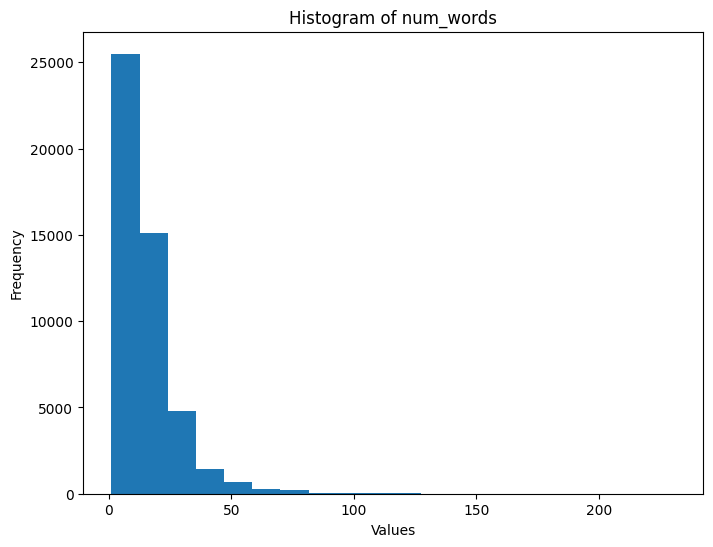

In [21]:
# Plot a histogram of the column data to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(df['num_words'], bins=20)
plt.title(f'Histogram of num_words')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [22]:
df[(df['num_words']>1) & (df['num_words'] < 75)].describe()

,hotel,label_vader,label,num_words
count,4.765700e+04,47657.000000,47657.000000,47657.000000
mean,3.509196e+06,0.708626,0.708626,14.579306
std,3.550998e+06,0.454400,0.454400,10.914076
min,2.995860e+05,0.000000,0.000000,2.000000
25%,6.128060e+05,0.000000,0.000000,7.000000
50%,2.316221e+06,1.000000,1.000000,12.000000
75%,5.508253e+06,1.000000,1.000000,19.000000
max,1.511886e+07,1.000000,1.000000,74.000000


In [23]:
df = df[(df['num_words']>1) & (df['num_words'] < 75)]
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
Index: 47657 entries, 0 to 48197
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel        47657 non-null  int64 
 1   sentence     47657 non-null  object
 2   label_vader  47657 non-null  int64 
 3   label        47657 non-null  int64 
 4   num_words    47657 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.2+ MB


In [24]:
df1 = df[df['label']==1]
df1.info()

<class 'modin.pandas.dataframe.DataFrame'>
Index: 33771 entries, 6 to 48197
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel        33771 non-null  int64 
 1   sentence     33771 non-null  object
 2   label_vader  33771 non-null  int64 
 3   label        33771 non-null  int64 
 4   num_words    33771 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ MB


In [25]:
df1 = df1[:80000]
df1.sample(10)

,hotel,sentence,label_vader,label,num_words
36294,5508253,"The pool is very good , although cold at this ...",1,1,14
4849,302836,The true value of the hotel for our family was...,1,1,19
25786,2350513,"Also , laundry service is amazing !",1,1,7
32946,4456285,"Firstly the location is excellent , with the B...",1,1,63
8215,451099,"The dining room and bar staff were lovely , as...",1,1,18
46481,12213991,The room is spacious and clean .,1,1,7
36,299586,The staff were lovely and the complimentary ba...,1,1,11
30983,3591310,"The Team of , and Kan have proved that I chose...",1,1,14
40320,7369358,Buffet breakfast excellent and in room all in ...,1,1,22
2599,302627,Good price great Me and my husband had a great...,1,1,14


In [26]:
df2 = df[df['label']==0]
df2.info()

<class 'modin.pandas.dataframe.DataFrame'>
Index: 13886 entries, 0 to 48191
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel        13886 non-null  int64 
 1   sentence     13886 non-null  object
 2   label_vader  13886 non-null  int64 
 3   label        13886 non-null  int64 
 4   num_words    13886 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 650.9+ KB


In [ ]:
# from sklearn.model_selection import train_test_split


# # Split the dataset into a training set (80%) and a test set (20%)
# X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.2, random_state=42)

# X_train.info()


In [ ]:
# y_train.info()

In [ ]:
# folder = "/home/ubuntu/WORK/selfexplain-semantic-topic-modeling/SelfExplain/data/RoBERTa-Tripadvisor/"
# X_train.to_csv(folder + 'train.tsv', sep='\t', index=False)
# y_train.to_csv(folder + 'test.tsv', sep='\t', index=False)

# Split with Stratify for preserving the label distribution

In [40]:
import pandas as pd1
df3 = pd.concat([pd1.DataFrame(df1), pd1.DataFrame(df2)])
# df3=df3[["sentence","label"]]
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 47657 entries, 0 to 13885
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       47657 non-null  object
 1   1       47657 non-null  object
 2   2       47657 non-null  object
 3   3       47657 non-null  object
 4   4       47657 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB
None


,0,1,2,3,4
0,299586,Lovely lake after change of .,1,1,6
1,299586,( That ' s how it ' s written Our accommodatio...,1,1,14
2,299586,Staff are amazing and the wonderful .,1,1,7
3,299586,We selected the executive lounge option on our...,1,1,18
4,299586,One of the of the lounge is that you get the o...,1,1,29


In [41]:
df3 = pd.DataFrame({
    "sentence": df3[1].tolist(),
    "label": df3[2].tolist()
})
df3

,sentence,label
0,Lovely lake after change of .,1
1,( That ' s how it ' s written Our accommodatio...,1
2,Staff are amazing and the wonderful .,1
3,We selected the executive lounge option on our...,1
4,One of the of the lounge is that you get the o...,1
...,...,...
47652,"Conveniently , we to everything in the old qua...",0
47653,We totally our stay .,0
47654,in the middle of with all you Need close to th...,0
47655,They offer Airport Transportation .,0


In [42]:
df3['label'].value_counts()

label
1    33771
0    13886
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split


# Assuming you have your feature data in X and label data in y

# Split the data into training and testing sets, stratifying based on the label y
X_train, X_test, y_train, y_test = train_test_split(df3, df3, test_size=0.2, stratify=df3['label'], random_state=42)

# Now, you have X_train, X_test, y_train, y_test with preserved label distribution.
print(X_train.info())

print("----\n")

print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38125 entries, 11437 to 28487
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  38125 non-null  object
 1   label     38125 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 893.6+ KB
None
----

<class 'pandas.core.frame.DataFrame'>
Index: 9532 entries, 15510 to 35159
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  9532 non-null   object
 1   label     9532 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 223.4+ KB
None


In [44]:
print(X_train['label'].value_counts())

print("----\n")

print(y_test['label'].value_counts())

label
1    27016
0    11109
Name: count, dtype: int64
----

label
1    6755
0    2777
Name: count, dtype: int64


In [47]:
X_test.sample(5)

,sentence,label
8366,"Stayed two nights at this hotel , great locati...",1
41097,The Sea was too rough to swim in due to our ti...,0
2829,Nice pool and gym and free .,1
26558,There ' a also a great Pho noodle soup place n...,1
22717,"We met a very nice team , just young people .",1


In [48]:
y_test.head()

,sentence,label
15510,Take one of the free from the hotel and explor...,1
2056,", The were comfortable and the were clean .",1
17211,", The pool and beach area are great .",1
7664,"Kim , she is a very nice lady , she an a very ...",1
11284,"The staff were consistently kind , helpful and...",1


In [49]:
folder = "/home/ubuntu/WORK/selfexplain-semantic-topic-modeling/SelfExplain/data/RoBERTa-Tripadvisor/"
X_train.to_csv(folder + 'train.tsv', sep='\t', index=False)
y_test.to_csv(folder + 'dev.tsv', sep='\t', index=False)

# Check average length of sameple dataset

In [ ]:
file_path = "/home/ubuntu/WORK/selfexplain-semantic-topic-modeling/SelfExplain/data/RoBERTa-SST-2/train.tsv"

In [ ]:
df = pd.read_csv(file_path, sep='\t')
df.info()

In [ ]:
df.sample(10)

In [ ]:
def get_len(r):
    return len(str(r).split())

In [15]:
sentences_lens = df['sentence'].apply(lambda r: get_len(r))

In [16]:
sentences_lens

0        21
1        22
2        15
3        36
4        50
         ..
48193     3
48194    24
48195    11
48196     7
48197     5
Name: sentence, Length: 48198, dtype: int64

In [17]:
sentences_lens.describe()

count    48198.000000
mean        14.995560
std         12.850073
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max        231.000000
Name: sentence, dtype: float64

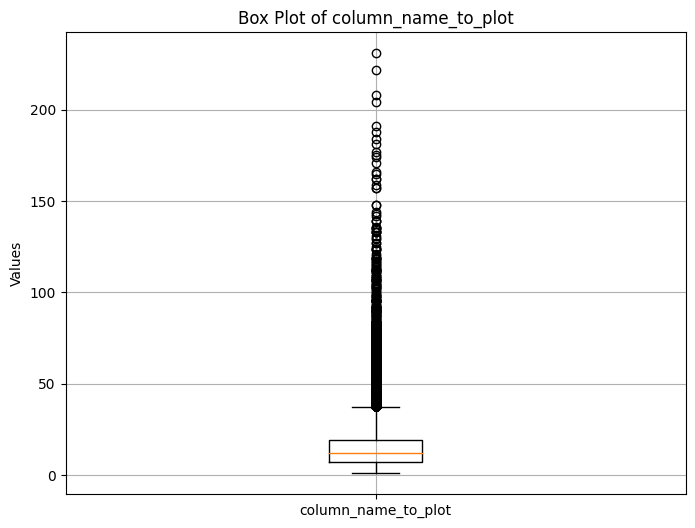

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded in a pandas DataFrame named 'df'

# Choose the column for which you want to plot outliers
column_name = 'column_name_to_plot'

# Plot a box plot for the selected column
plt.figure(figsize=(8, 6))
plt.boxplot(sentences_lens)
plt.title(f'Box Plot of {column_name}')
plt.ylabel('Values')
plt.xticks([1], [column_name])  # Show the column name on the x-axis
plt.grid(True)
plt.show()


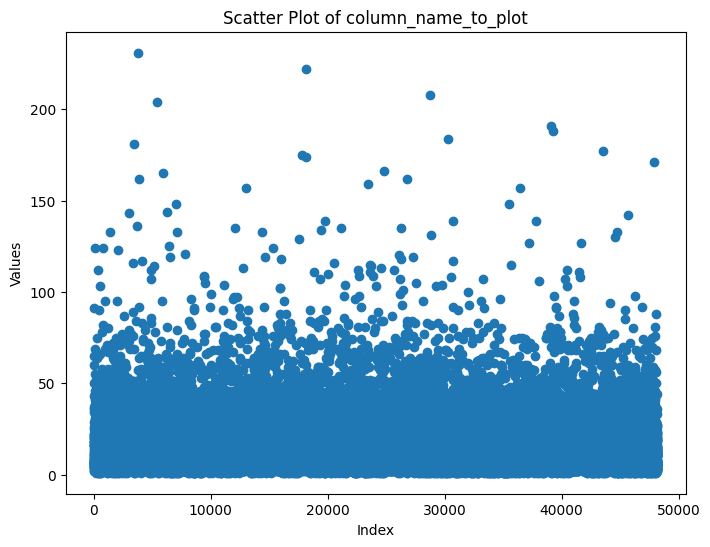

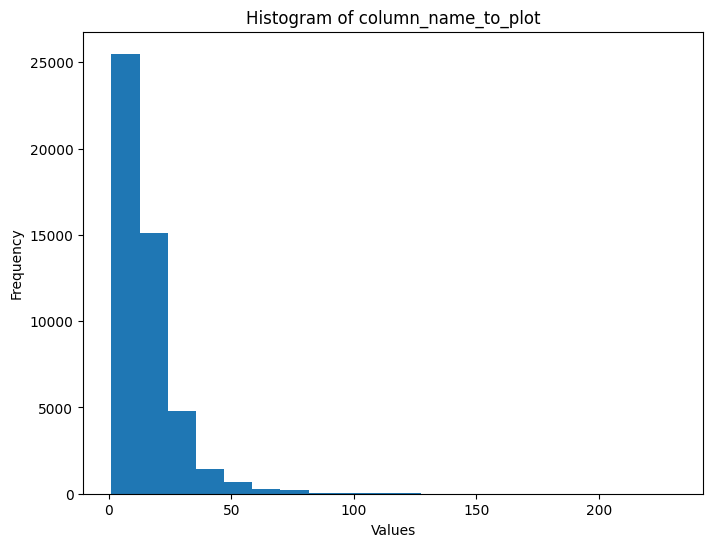

In [19]:
# Plot a scatter plot of the column data to visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(range(len(sentences_lens)), sentences_lens)
plt.title(f'Scatter Plot of {column_name}')
plt.ylabel('Values')
plt.xlabel('Index')
plt.show()

# Plot a histogram of the column data to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(sentences_lens, bins=20)
plt.title(f'Histogram of {column_name}')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


From diagrams, so let select the number of words (after splitted) **in range 10 - 250**